# ДОМАШНЕЕ ЗАДАНИЕ

Воспользуемся данными по Марвел.

Первичный источник данных [Marvel Wikia](http://marvel.wikia.com/Main_Page)

[Скачиваем данные](https://github.com/fivethirtyeight/data/blob/master/comic-characters/marvel-wikia-data.csv)  (кнопка Download)

Variable | Definition
---|---------
page_id | Уникальный идентификатор персонажа на странице wikia
name | Имя персонажа
urlslug | Уникальный url в wikia который ведет к этому персонажу
ID | Идентификационный статус персонажа (Secret Identity, Public identity, [on marvel only: No Dual Identity])
ALIGN | Характиристика персонажа (Good, Bad or Neutral)
EYE | Цвет глаз
HAIR | Цвет волос
SEX | Пол персонажа (e.g. Male, Female, etc.)
GSM | Относится ли персонаж к сексуальному меньшинсву (e.g. Homosexual characters, bisexual characters)
ALIVE | Жив ли персонаж
APPEARANCES | Количество появлений персонажа в комиксах (на момент Sep. 2, 2014)
FIRST APPEARANCE | Месяц и год первого появления персонажа в комиксе
YEAR | Год первого появления персонажа в комиксе

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("marvel-wikia-data.csv")

In [3]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


# Задание  1.1

Постройте сводную таблицу для датасета по признакам ALIGN и ALIVE, вычисляя их среднее по количеству появлений APPEARANCES

* В среднем появлений живых плохих персонажей, чуть больше (практически равно), чем появлений умерших плохих 

* В среднем появлений живых плохих персонажей, значительно меньше, чем появлений живых хороших (я совсем не знаком с темой, но возможно делается упор на хороших персанажей для культивирования положительных качеств, что чаще попадается на глаза, то воспринимается естественеее)

* Хороших и нейтральных персонажей, значительно больше, чем плохих (по той же причине :)))

In [4]:
data.pivot_table(values='APPEARANCES', index=['ALIGN'], columns=['ALIVE'], aggfunc='mean')

ALIVE,Deceased Characters,Living Characters
ALIGN,,
Bad Characters,8.307278,8.338893
Good Characters,24.218905,37.401882
Neutral Characters,11.467871,22.181818


# Задание  1.2

Сделайте то же с помощью groupby

In [162]:
s = data.groupby(['ALIGN','ALIVE'])[['APPEARANCES']].agg('mean').unstack(level=-1)

In [167]:
s

APPEARANCES                  
ALIVE              Deceased Characters Living Characters
ALIGN                                                   
Bad Characters                8.307278          8.338893
Good Characters              24.218905         37.401882
Neutral Characters           11.467871         22.181818

# Задание  2

Создать excel таблицу с графиками. Найдите данные за январь 2019 и 2018 года и постройте обычные графики изменения температур (кривая) (необходимо найти соответствующий тип графика для функции add_chart).


In [151]:
nsk_2018 = pd.read_html('http://www.pogodaiklimat.ru/monitor.php?id=29638&month=1&year=2018')[0]
nsk_2019 = pd.read_html('http://www.pogodaiklimat.ru/monitor.php?id=29638&month=1&year=2019')[0]

In [152]:
nsk_2018.columns = nsk_2018.iloc[1,:]
nsk_2018 = nsk_2018.iloc[2:,:]
nsk_2018.index = nsk_2018.Дата
del nsk_2018['Дата']
nsk_2018.loc[:,'Минимум':] = nsk_2018.loc[:,'Минимум':].apply(pd.to_numeric)

In [153]:
nsk_2019.columns = nsk_2019.iloc[1,:]
nsk_2019 = nsk_2019.iloc[2:,:]
nsk_2019.index = nsk_2019.Дата
del nsk_2019['Дата']
nsk_2019.loc[:,'Минимум':] = nsk_2019.loc[:,'Минимум':].apply(pd.to_numeric)

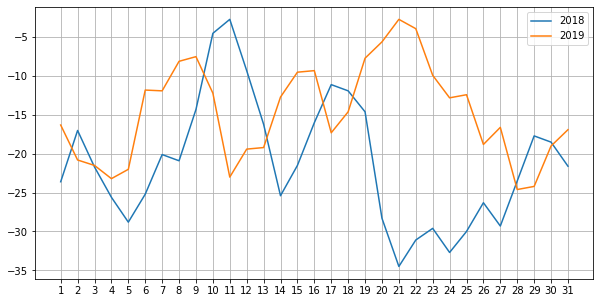

In [168]:
plt.figure(facecolor='white', figsize = (10,5))
plt.grid()

plt.plot(nsk_2018.Средняя, label = '2018')
plt.plot(nsk_2019.Средняя, label = '2019')
plt.legend()
plt.show()


In [201]:
import xlsxwriter

workbook = xlsxwriter.Workbook('temp.xlsx')
worksheet = workbook.add_worksheet()

worksheet.write('A1', 'Число')
worksheet.write('B1', '2018')
worksheet.write('C1', '2019')

worksheet.write_column('A3', range(1,32))
worksheet.write_column('B3', nsk_2018.Средняя) 
worksheet.write_column('C3', nsk_2019.Средняя) 

chart1 = workbook.add_chart({'type': 'line'}) 

chart1.add_series({ 
    'name':       ['Sheet1', 0, 1], 
    'categories': ['Sheet1', 2, 0, 32,0], 
    'values':     ['Sheet1', 2, 1, 32,1], 
}) 


chart1.add_series({ 
    'name':       ['Sheet1', 0, 2], 
    'categories': ['Sheet1', 2, 0, 32,0], 
    'values':     ['Sheet1', 2, 2, 32,2], 
}) 

chart1.set_title ({'name': 'Темперутара в январе'}) 
chart1.set_x_axis({'name': 'Дата'}) 
chart1.set_y_axis({'name': 'температура'}) 

chart1.set_style(10) 
  
worksheet.insert_chart('F2', chart1) 

workbook.close()

# Задание  3

Собрать в одну таблицу все данные с сайта https://ru.wikipedia.org/wiki/Хронология_отмены_рабства_и_крепостного_права_по_странам. Отобразите ее.

Проследить изменения по России, вывести все данные по нашей стране.

Где рабство было отменено последним? А первым? Сколько лет прошло между этими событиями?

In [244]:
df = pd.read_html('https://ru.wikipedia.org/wiki/%D0%A5%D1%80%D0%BE%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F_%D0%BE%D1%82%D0%BC%D0%B5%D0%BD%D1%8B_%D1%80%D0%B0%D0%B1%D1%81%D1%82%D0%B2%D0%B0_%D0%B8_%D0%BA%D1%80%D0%B5%D0%BF%D0%BE%D1%81%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B0%D0%B2%D0%B0_%D0%BF%D0%BE_%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B0%D0%BC')

In [245]:
df = pd.concat([pd.concat(df[0:2]), pd.concat(df[4:])]).dropna(subset = ['Статус'])
df = df.drop(df[df.Страна == 'Страна'].index).reset_index()
del df['index']

In [247]:
sorted(df.Страна.unique())

['Австралия',
 'Австрия',
 'Австро-Венгрия',
 'Азербайджан',
 'Алабама (США)',
 'Албания',
 'Алжир',
 'Англия',
 'Арагонская корона',
 'Аргентина',
 'Афганистан',
 'Афины',
 'Багамские Острова',
 'Бангладеш',
 'Барбадос',
 'Бахрейн',
 'Белорусская ССР',
 'Бельгия',
 'Бирма[комм. 2]',
 'Болгария',
 'Боливия',
 'Босния и Герцеговина',
 'Босния и Герцеговина (авст.-венгр.)',
 'Бразилия',
 'Британская Индия (брит.)',
 'Бутан',
 'Варшавское герцогство',
 'Великая Колумбия',
 'Великобритания',
 'Великобритания (без колоний)',
 'Великое княжество Московское',
 'Венгрия',
 'Венесуэла',
 'Венецианская республика',
 'Вермонт',
 'Верхняя Канада (брит.)',
 'Габсбургская монархия',
 'Гавайи',
 'Гаити',
 'Гватемала',
 'Гвинея',
 'Гельветическая республика[33]',
 'Германия',
 'Греция',
 'Гуам (США)',
 'Дания',
 'Датская Вест-Индия',
 'Датско-норвежская уния',
 'Держава Ахеменидов',
 'Династия Цинь',
 'Договорный Оман',
 'Доминика',
 'Доминион Цейлон[комм. 3]',
 'Дубровницкая республика[8]',
 'Египет'

In [248]:
df

,Год,Страна,Статус,Причина,Примечание
0,кон. VIII в.до н.э.,Египет,Частично отменено,NaN,Бокхорис отменяет долговое рабство для египтян...
1,нач. VI в.до н.э.,Афины,Частично отменено,NaN,Солон отменяет долговое рабство и освобождает ...
2,539до н.э.,Держава Ахеменидов,Частично отменено,NaN,[1]
3,376до н.э.,Римская республика,Частично отменено,NaN,NaN
4,III в.до н.э.,Империя Маурьев,Частично отменено,NaN,Ашока объявил об отмене работорговли и призвал...
...,...,...,...,...,...
318,2003,Нигер,Рабовладение запрещено,NaN,[53]
319,2006,Черногория,Подписано соглашение,Конвенция о рабстве 1926 года,NaN
320,2007,Мавритания,Рабовладение запрещено,NaN,[59]
321,2007,Парагвай,Подписано соглашение,Конвенция о рабстве 1926 года,NaN


In [249]:
df[df.Страна == 'Россия']

,Год,Страна,Статус,Причина,Примечание
83,1815,Россия,Подписано соглашение,Венский конгресс,[41]
133,1861,Россия,Крепостное право отменено,Крестьянская реформа в России,см. статью
171,1890,Россия,Подписано соглашение,Генеральный акт Брюссельской конференции (от 2...,NaN
190,1904,Россия,Подписано соглашение,Международный договор о борьбе с торговлей бел...,NaN


In [250]:
df[df.Страна.isin(['Великое княжество Московское', 'Россия', 'Российская империя','Русское царство', 'СССР'])]

,Год,Страна,Статус,Причина,Примечание
27,1497,Великое княжество Московское,Крепостное право частично введено,Судебник 1497 года,Судебник 1497 года стал первым российским зако...
33,1592?,Русское царство,Крепостное право введено?,Указ Бориса Годунова?,По мнению русского историка В. Н. Татищева кре...
36,1649,Русское царство,Крепостное право введено окончательно,Соборное уложение 1649 года,Бессрочный сыск беглых крестьян.
43,1723,Российская империя,Частично отменено,NaN,"Пётр I отменяет холопство на Руси, при этом кр..."
62,1797,Российская империя,Крепостное право ограничено,Манифест о трёхдневной барщине,Ограничил срок работы крепостного крестьянина ...
83,1815,Россия,Подписано соглашение,Венский конгресс,[41]
108,1833,Российская империя,Крепостное право ограничено,указ Николая I от 2 (14) мая,Запрещал продавать крепостных крестьян с публи...
133,1861,Россия,Крепостное право отменено,Крестьянская реформа в России,см. статью
171,1890,Россия,Подписано соглашение,Генеральный акт Брюссельской конференции (от 2...,NaN
190,1904,Россия,Подписано соглашение,Международный договор о борьбе с торговлей бел...,NaN


In [257]:
abolition_of_slavery = df[df['Статус'] == 'Рабство отменено']

In [267]:
print('Первая страна отменившая рабство: {} в {} году.\nПоследняя страна отменившая рабство: {} в {} году.\nМежду этими событиями прошло: {} лет.'.format(
    abolition_of_slavery.Страна.head(1).values[0][:-3],
    abolition_of_slavery.Год.head(1).values[0],
    abolition_of_slavery.Страна.tail(1).values[0],
    abolition_of_slavery.Год.tail(1).values[0],
    int(abolition_of_slavery.Год.tail(1).values[0]) - int(abolition_of_slavery.Год.head(1).values[0])
))


Первая страна отменившая рабство: Корчула в 1214 году.
Последняя страна отменившая рабство: Мавритания в 1981 году.
Между этими событиями прошло: 767 лет.
